In [0]:
#Fonte: https://dados.gov.br/dataset/painel-de-produtores-de-derivados-producao-de-biocombustiveis
etanol_producao_path = '/FileStore/tables/etanol/landing/etanol_producao.csv'

In [0]:
from pyspark.sql.types import *

schema_etanol_producao = StructType([
    StructField("mes_ano", StringType(), False),
    StructField("estado", StringType(), False),
    StructField("regiao", StringType(), False),
    StructField("prod_etanol_hidratado", StringType(), False),
    StructField("prod_etanol_anidro", StringType(), False)
])
etanol_producao_1 = spark.read.schema(schema_etanol_producao).csv(etanol_producao_path, header=True)
etanol_producao_1.show()

+-------+-------------------+------------+---------------------+------------------+
|mes_ano|             estado|      regiao|prod_etanol_hidratado|prod_etanol_anidro|
+-------+-------------------+------------+---------------------+------------------+
|01/2019|            Alagoas|    NORDESTE|            42103,715|         31460,603|
|01/2019|     Espírito Santo|     SUDESTE|             1131,488|          7962,071|
|01/2019|              Goiás|CENTRO OESTE|            21947,227|          6727,955|
|01/2019|        Mato Grosso|CENTRO OESTE|            37365,208|         33146,105|
|01/2019| Mato Grosso do Sul|CENTRO OESTE|            17807,677|          23147,51|
|01/2019|       Minas Gerais|     SUDESTE|              546,023|              null|
|01/2019|             Paraná|         SUL|             3655,084|              null|
|01/2019|            Paraíba|    NORDESTE|            15903,204|         13118,498|
|01/2019|               Pará|       NORTE|             1401,816|          12

In [0]:
from pyspark.sql.functions import regexp_replace
etanol_producao_2 = etanol_producao_1.withColumn('prod_etanol_hidratado', regexp_replace('prod_etanol_hidratado', ',', '.'))
etanol_producao_3 = etanol_producao_2.withColumn('prod_etanol_anidro', regexp_replace('prod_etanol_anidro', ',', '.'))

etanol_producao_4 = etanol_producao_3.withColumn("prod_etanol_hidratado", etanol_producao_3["prod_etanol_hidratado"].cast(DoubleType()))
etanol_producao_5 = etanol_producao_4.withColumn("prod_etanol_anidro", etanol_producao_4["prod_etanol_anidro"].cast(DoubleType()))

In [0]:
from pyspark.sql.functions import upper
etanol_producao_6 = etanol_producao_5.withColumn('estado', upper(etanol_producao_5.estado))
etanol_producao_6.show()

+-------+-------------------+------------+---------------------+------------------+
|mes_ano|             estado|      regiao|prod_etanol_hidratado|prod_etanol_anidro|
+-------+-------------------+------------+---------------------+------------------+
|01/2019|            ALAGOAS|    NORDESTE|            42103.715|         31460.603|
|01/2019|     ESPÍRITO SANTO|     SUDESTE|             1131.488|          7962.071|
|01/2019|              GOIÁS|CENTRO OESTE|            21947.227|          6727.955|
|01/2019|        MATO GROSSO|CENTRO OESTE|            37365.208|         33146.105|
|01/2019| MATO GROSSO DO SUL|CENTRO OESTE|            17807.677|          23147.51|
|01/2019|       MINAS GERAIS|     SUDESTE|              546.023|              null|
|01/2019|             PARANÁ|         SUL|             3655.084|              null|
|01/2019|            PARAÍBA|    NORDESTE|            15903.204|         13118.498|
|01/2019|               PARÁ|       NORTE|             1401.816|          12

In [0]:
etanol_producao_7 = etanol_producao_6.na.fill(0)
etanol_producao_7.show()

+-------+-------------------+------------+---------------------+------------------+
|mes_ano|             estado|      regiao|prod_etanol_hidratado|prod_etanol_anidro|
+-------+-------------------+------------+---------------------+------------------+
|01/2019|            ALAGOAS|    NORDESTE|            42103.715|         31460.603|
|01/2019|     ESPÍRITO SANTO|     SUDESTE|             1131.488|          7962.071|
|01/2019|              GOIÁS|CENTRO OESTE|            21947.227|          6727.955|
|01/2019|        MATO GROSSO|CENTRO OESTE|            37365.208|         33146.105|
|01/2019| MATO GROSSO DO SUL|CENTRO OESTE|            17807.677|          23147.51|
|01/2019|       MINAS GERAIS|     SUDESTE|              546.023|               0.0|
|01/2019|             PARANÁ|         SUL|             3655.084|               0.0|
|01/2019|            PARAÍBA|    NORDESTE|            15903.204|         13118.498|
|01/2019|               PARÁ|       NORTE|             1401.816|          12

In [0]:
etanol_producao_7.printSchema()

root
 |-- mes_ano: string (nullable = true)
 |-- estado: string (nullable = true)
 |-- regiao: string (nullable = true)
 |-- prod_etanol_hidratado: double (nullable = false)
 |-- prod_etanol_anidro: double (nullable = false)



In [0]:
from pyspark.sql.functions import to_date, unix_timestamp

etanol_producao_8 = etanol_producao_7.withColumn('mes_ano',to_date(unix_timestamp('mes_ano', 'MM/yyyy').cast('timestamp')))

In [0]:
etanol_producao_8.show()

+----------+-------------------+------------+---------------------+------------------+
|   mes_ano|             estado|      regiao|prod_etanol_hidratado|prod_etanol_anidro|
+----------+-------------------+------------+---------------------+------------------+
|2019-01-01|            ALAGOAS|    NORDESTE|            42103.715|         31460.603|
|2019-01-01|     ESPÍRITO SANTO|     SUDESTE|             1131.488|          7962.071|
|2019-01-01|              GOIÁS|CENTRO OESTE|            21947.227|          6727.955|
|2019-01-01|        MATO GROSSO|CENTRO OESTE|            37365.208|         33146.105|
|2019-01-01| MATO GROSSO DO SUL|CENTRO OESTE|            17807.677|          23147.51|
|2019-01-01|       MINAS GERAIS|     SUDESTE|              546.023|               0.0|
|2019-01-01|             PARANÁ|         SUL|             3655.084|               0.0|
|2019-01-01|            PARAÍBA|    NORDESTE|            15903.204|         13118.498|
|2019-01-01|               PARÁ|       NORT

In [0]:
etanol_producao_8.write.option('header', 'true').parquet('/FileStore/tables/etanol/processing/etanol_producao2.parquet')

In [0]:
etanol_producao_processing_path = '/FileStore/tables/etanol/processing/etanol_producao2.parquet'
etanol_producao_processing = spark.read.parquet(etanol_producao_processing_path)
etanol_producao_processing.show()

+----------+-------------------+------------+---------------------+------------------+
|   mes_ano|             estado|      regiao|prod_etanol_hidratado|prod_etanol_anidro|
+----------+-------------------+------------+---------------------+------------------+
|2019-01-01|            ALAGOAS|    NORDESTE|            42103.715|         31460.603|
|2019-01-01|     ESPÍRITO SANTO|     SUDESTE|             1131.488|          7962.071|
|2019-01-01|              GOIÁS|CENTRO OESTE|            21947.227|          6727.955|
|2019-01-01|        MATO GROSSO|CENTRO OESTE|            37365.208|         33146.105|
|2019-01-01| MATO GROSSO DO SUL|CENTRO OESTE|            17807.677|          23147.51|
|2019-01-01|       MINAS GERAIS|     SUDESTE|              546.023|               0.0|
|2019-01-01|             PARANÁ|         SUL|             3655.084|               0.0|
|2019-01-01|            PARAÍBA|    NORDESTE|            15903.204|         13118.498|
|2019-01-01|               PARÁ|       NORT

In [0]:
etanol_producao_processing.createOrReplaceTempView("etanol_producaoView")

In [0]:
producao_mes = spark.sql("SELECT mes_ano, SUM(prod_etanol_anidro) + SUM(prod_etanol_hidratado) as prod_etanol FROM etanol_producaoView group by mes_ano order by mes_ano")
display(producao_mes)

mes_ano,prod_etanol
2019-01-01,357507.2799999999
2019-02-01,226009.72499999995
2019-03-01,581920.0830000001
2019-04-01,2265841.51
2019-05-01,4051197.584
2019-06-01,4586545.5200000005
2019-07-01,4984281.051999999
2019-08-01,5382159.692
2019-09-01,4906850.089
2019-10-01,4761481.304


In [0]:
producao_regiao = spark.sql("SELECT regiao, SUM(prod_etanol_anidro) + SUM(prod_etanol_hidratado) as prod_etanol FROM etanol_producaoView group by regiao order by prod_etanol desc")
display(producao_regiao)

regiao,prod_etanol
SUDESTE,5.3527536355E7
CENTRO OESTE,3.356127750100002E7
NORDESTE,5402839.864999998
SUL,4114314.3540000003
NORTE,724632.19


In [0]:
producao_mes_sudeste = spark.sql("SELECT mes_ano, SUM(prod_etanol_anidro) + SUM(prod_etanol_hidratado) as prod_etanol FROM etanol_producaoView WHERE regiao = 'SUDESTE' group by mes_ano order by mes_ano")
display(producao_mes_sudeste)

mes_ano,prod_etanol
2019-01-01,22713.922
2019-02-01,9033.940999999999
2019-03-01,198613.038
2019-04-01,1322373.351
2019-05-01,2569301.098
2019-06-01,2860807.341
2019-07-01,3080750.126
2019-08-01,3269270.1960000005
2019-09-01,2875361.129
2019-10-01,2824550.543


In [0]:
producao_mes_centroeste= spark.sql("SELECT mes_ano, SUM(prod_etanol_anidro) + SUM(prod_etanol_hidratado) as prod_etanol FROM etanol_producaoView WHERE regiao = 'CENTRO OESTE' group by mes_ano order by mes_ano")
display(producao_mes_centroeste)

mes_ano,prod_etanol
2019-01-01,140141.682
2019-02-01,120037.0
2019-03-01,296943.76
2019-04-01,748704.76
2019-05-01,1227785.105
2019-06-01,1441332.514
2019-07-01,1554920.336
2019-08-01,1634673.301
2019-09-01,1534401.471
2019-10-01,1334277.888


In [0]:
producao_mes_nordeste= spark.sql("SELECT mes_ano, SUM(prod_etanol_anidro) + SUM(prod_etanol_hidratado) as prod_etanol FROM etanol_producaoView WHERE regiao = 'NORDESTE' group by mes_ano order by mes_ano")
display(producao_mes_nordeste)

mes_ano,prod_etanol
2019-01-01,188358.25
2019-02-01,92052.48499999999
2019-03-01,49853.038
2019-04-01,21688.034000000003
2019-05-01,43024.02099999999
2019-06-01,54665.58499999999
2019-07-01,85098.02100000001
2019-08-01,143534.491
2019-09-01,233580.752
2019-10-01,349050.963


In [0]:
producao_mes_sul= spark.sql("SELECT mes_ano, SUM(prod_etanol_anidro) + SUM(prod_etanol_hidratado) as prod_etanol FROM etanol_producaoView WHERE regiao = 'SUL' group by mes_ano order by mes_ano")
display(producao_mes_sul)

mes_ano,prod_etanol
2019-01-01,3655.084
2019-02-01,4886.299
2019-03-01,36397.998999999996
2019-04-01,163657.782
2019-05-01,192824.438
2019-06-01,201630.59100000001
2019-07-01,231159.49
2019-08-01,295716.579
2019-09-01,227746.141
2019-10-01,218149.796


In [0]:
producao_mes_norte= spark.sql("SELECT mes_ano, SUM(prod_etanol_anidro) + SUM(prod_etanol_hidratado) as prod_etanol FROM etanol_producaoView WHERE regiao = 'NORTE' group by mes_ano order by mes_ano")
display(producao_mes_norte)

mes_ano,prod_etanol
2019-01-01,2638.342
2019-03-01,112.248
2019-04-01,9417.583
2019-05-01,18262.922
2019-06-01,28109.489
2019-07-01,32353.078999999998
2019-08-01,38965.125
2019-09-01,35760.596
2019-10-01,35452.113999999994
2019-11-01,30437.426


In [0]:
producao_estado = spark.sql("SELECT estado, SUM(prod_etanol_anidro) + SUM(prod_etanol_hidratado) as prod_etanol FROM etanol_producaoView group by estado order by prod_etanol desc")
display(producao_estado)

estado,prod_etanol
SÃO PAULO,4.337847047500001E7
GOIÁS,1.5699354105E7
MINAS GERAIS,9486724.938
MATO GROSSO,9042490.686999999
MATO GROSSO DO SUL,8819432.709000003
PARANÁ,4112585.0200000005
ALAGOAS,1268195.174
PARAÍBA,1061532.892
PERNAMBUCO,1019344.3669999999
BAHIA,832558.415


In [0]:
maior_producao = spark.sql("SELECT mes_ano, estado, SUM(prod_etanol_anidro) + SUM(prod_etanol_hidratado) as prod_etanol FROM etanol_producaoView group by mes_ano, estado order by prod_etanol desc limit 5")
display(maior_producao)

mes_ano,estado,prod_etanol
2019-08-01,SÃO PAULO,2662912.77
2019-07-01,SÃO PAULO,2459411.93
2019-10-01,SÃO PAULO,2352203.1859999998
2019-06-01,SÃO PAULO,2330562.674
2019-09-01,SÃO PAULO,2307498.421


In [0]:
menor_producao = spark.sql("SELECT mes_ano, estado, SUM(prod_etanol_anidro) + SUM(prod_etanol_hidratado) as prod_etanol FROM etanol_producaoView group by mes_ano, estado order by prod_etanol limit 5")
display(menor_producao)

mes_ano,estado,prod_etanol
2019-01-01,RIO DE JANEIRO,0.092
2020-12-01,RIO GRANDE DO SUL,0.3
2021-07-01,RIO GRANDE DO SUL,0.7
2021-02-01,MINAS GERAIS,1.06
2021-11-01,MARANHÃO,4.957


In [0]:
producao_mes.write.parquet('/FileStore/tables/etanol/curated/pruducao_mes2.parquet')

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [0]:
dataset_path = '/FileStore/tables/etanol/curated/pruducao_mes2.parquet'
dataset = spark.read.parquet(dataset_path)
dataset = dataset.toPandas()

In [0]:
time_series = dataset.set_index(['mes_ano'])
time_series.index = pd.to_datetime(time_series.index)
time_series

,prod_etanol
mes_ano,
2019-01-01,357507.280
2019-02-01,226009.725
2019-03-01,581920.083
2019-04-01,2265841.510
2019-05-01,4051197.584
2019-06-01,4586545.520
2019-07-01,4984281.052
2019-08-01,5382159.692
2019-09-01,4906850.089


Out[51]: [<matplotlib.lines.Line2D at 0x7efff69c29d0>]

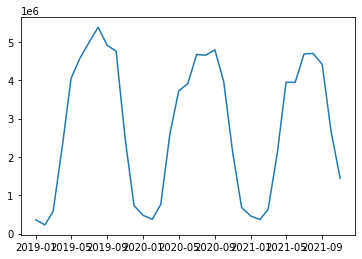

In [0]:
plt.plot(time_series)

In [0]:
model = ExponentialSmoothing(endog = time_series.prod_etanol.astype(float),
                             trend = "add",
                             seasonal = "add",
                             seasonal_periods = 12).fit()
predictions = model.forecast(steps = 12)
predictions

/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
Out[52]: 2021-12-01    4.591020e+05
2022-01-01    2.384232e+05
2022-02-01    1.445407e+05
2022-03-01    4.101289e+05
2022-04-01    1.862435e+06
2022-05-01    3.725537e+06
2022-06-01    3.719186e+06
2022-07-01    4.458014e+06
2022-08-01    4.473526e+06
2022-09-01    4.186815e+06
2022-10-01    2.449256e+06
2022-11-01    1.653486e+06
Freq: MS, dtype: float64

Out[53]: [<matplotlib.lines.Line2D at 0x7efff688a250>]

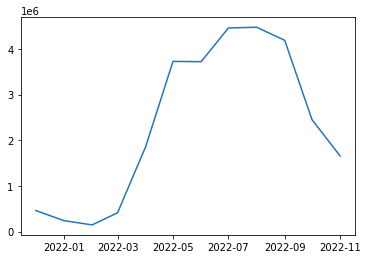

In [0]:
plt.plot(predictions)

Out[54]: <AxesSubplot:xlabel='mes_ano'>

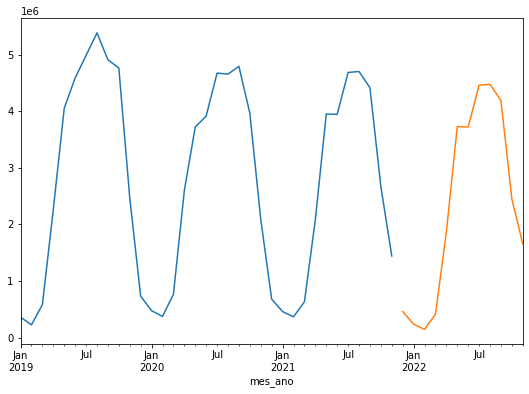

In [0]:
time_series['prod_etanol']['2019-01-01':].astype(float).plot(figsize = (9,6))
predictions.plot()

In [0]:
len(time_series)

Out[55]: 35

In [0]:
train = time_series[:25]
train.shape

Out[56]: (25, 1)

In [0]:
train.index.min(), train.index.max()

Out[57]: (Timestamp('2019-01-01 00:00:00'), Timestamp('2021-01-01 00:00:00'))

In [0]:
test = time_series[25:]
test.shape

Out[58]: (10, 1)

In [0]:
test.index.min(), test.index.max()

Out[59]: (Timestamp('2021-02-01 00:00:00'), Timestamp('2021-11-01 00:00:00'))

In [0]:
model2 = ExponentialSmoothing(endog = train.prod_etanol.astype(float),
                             trend = "add",
                             seasonal = "add",
                             seasonal_periods = 12).fit()
predictions = pd.DataFrame(model2.forecast(steps = 10), index=test.index)
predictions.columns = ['prod_etanol']

/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


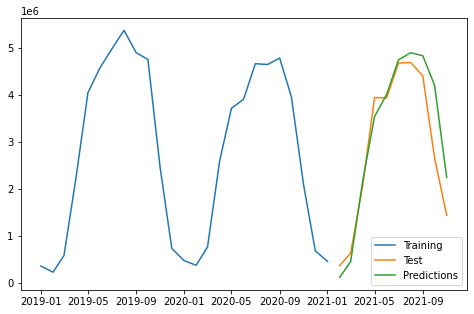

In [0]:
plt.figure(figsize=(8,5))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(predictions, label = 'Predictions')
plt.legend();